# Allgemeine Relativitätstheorie mit dem Computer 
# General Theory of Relativity on the Computer

## Vorlesung gehalten an der J.W.Goethe-Universität in Frankfurt am Main (Sommersemester 2021)

### von Dr.phil.nat. Dr.rer.pol. Matthias Hanauske

### Frankfurt am Main 04.04.2021


## Erster Vorlesungsteil: Allgemeine Relativitätstheorie mit Python


## Die Tolman-Oppenheimer-Volkoff (TOV) Gleichung
## Innenraum-Lösung eines sph&auml;risch symmetrischen, statischen Objektes (z.B. Erde, Neutronenstern)

## Von der Einstein Gleichung zur TOV Gleichung

In den vorigen Vorlesungen wurde die Geodätengleichung in vorgegebener Schwarzschild und Kerr Raumzeit für unterschiedliche Anfangsbedingungen numerisch analysiert. Die raumzeitliche Struktur, die Metrik, wurde hierbei als gegeben vorausgesetzt. In der folgenden Vorlesung betrachteten wir nun wie man die Metrik bei vorgegebener Materieverteilung berechnet. Die zugrundeliegende Gleichung, die es hier zu lösen gilt, ist die Einstein Gleichung (in kontra-kovarianter Darstellung)

$$ G^\mu{}\!_\nu = R^\mu{}\!_\nu - \frac{1}{2}g^\mu{}\!_\nu R =  8\pi T^\mu{}\!_\nu \quad.$$

Wir betrachten im Folgenden ein statisches, sph&auml;risch symmetrisches Objekt (in Näherung z.B. die Erde, Sonne oder ein Neutronenstern) und setzen die Metrik im Inneren wie folgt an:

$$g_{\mu\nu}=\left( \begin{array}{ccc} e^{2\Phi(r)} & 0 & 0 & 0\\ 0&  - \left(  1 - \frac{2 m(r)}{r} \right)^{-1}&  0&0 \\ 0&  0&  -r^2& 0\\ 0&  0&  0& -r^2 \hbox{sin}^2(\theta)\\ \end{array} \right) \quad  ,
$$

wobei die Funktionen $\phi(r)$ und $m(r)$ an dieser Stelle noch unbekannt sind, sp&auml;ter aber eine physikalische Bedeutung erhalten. Die Materie setzen wir als eine ideale Fl&uuml;ssigkeit mit folgendem Energie-Impuls Tensor an:

$$ T^\mu{}\!_\nu=\left( \begin{array}{ccc} e(r) & 0 & 0 & 0\\ 0& -p(r)&  0&0 \\ 0&  0&  -p(r)& 0\\ 0&  0&  0& -p(r)\\ \end{array} \right) \quad  ,
$$

wobei die Funktionen $e(r)$ und $p(r)$ die Energiedichte und den Druck der Materie darstellen. Die raumzeitliche Struktur im Inneren der Materie erhält man mittels der Einstein Gleichung, die im betrachteten Fall ein System von vier gekoppelten Differentialgleichungen darstellt

$$
\begin{eqnarray}
G^t{}\!_t &=& R^t\!_t - \frac{1}{2} R =  8\pi T^t{}\!_t = 8\pi \, e(r) \\
G^r\!_r &=& R^r\!_r - \frac{1}{2} R =  8\pi T^r\!_r = -8\pi \, p(r)\\
G^\theta{}\!_\theta &=& R^\theta\!_\theta - \frac{1}{2} R =  8\pi T^\theta{}\!_\theta = -8\pi \, p(r)\\
G^\phi{}\!_\phi &=& R^\phi{}\!_\phi - \frac{1}{2} R =  8\pi T^\phi{}\!_\phi = -8\pi \, p(r) \quad.
\end{eqnarray}
$$

Zus&auml;tzlich folgt aus der Einsteingleichung die kovariante Erhaltung des Energie-Impulses. Diese sogenannten hydrodynamischen Gleichungen sind durch die folgenden vier Gleichungen definiert:

$$
\nabla\!_\mu G^\mu{}\!_\nu = 0 \quad \rightarrow \quad \nabla\!_\mu T^\mu{}\!_\nu = 0 \quad ,
$$

wobei die kovariante Ableitung eines Tensors zweiter Stufe wie folgt definiert ist:

$$
\nabla\!_\alpha T^\mu{}\!_\nu = \partial_\alpha T^\mu{}\!_\nu + \Gamma^\mu_{\alpha \rho} T^\rho{}\!_\nu  - \Gamma^\rho_{\alpha \nu} T^\mu{}\!_\rho   \quad .
$$

Durch Umschreiben und Kombination der Gleichungen gelangt man zu einem System von drei gekoppelten Differentialgleichungen erster Ordnung, die sogenannten <i>Tolman-Oppenheimer-Volkoff (TOV) Gleichungen</i>:

$$
\begin{eqnarray}
\frac{dm}{dr} &=& 4\pi r^2~e(r) ~, \\
\frac{d\Phi}{dr}  &=& \frac{m(r)+4 \pi r^3 p(r)}{r \left(r - 2m(r) \right)} ~, \\
\frac{dp}{dr}  &=& -(e(r)+p(r)) \frac{d\Phi}{dr} 
\end{eqnarray}
$$

Die Funktion $m(r)$, welche die $g_{rr}$-Komponente der Metrik bestimmt, erhält nun ihre physikalische Bedeutung. Integriert man vom Zentrum des betrachteten Objektes die erste der TOV-Gleichungen bis zu einem Radius $r$, so beschreibt $m(r)$ den, in dieser Kugel enthaltenen, Massen/Energiebetrag $\left( m(r)=\int_0^r 4\pi \tilde{r}^2~e(\tilde{r}) \, d\tilde{r}  \right)$. Die gesamte gravitativ wirkende Masse des Objektes erhält man, indem man bis zum Rand des Objektes bei $r=R$ integriert $\left( M = m(R)=\int_0^R 4\pi \tilde{r}^2~e(\tilde{r}) \, d\tilde{r}  \right)$. Um die TOV-Gleichungen numerisch lösen zu können benötigt man noch die Zustandsgleichung der Materie (eine Funktion $p(e)$).  

In diesem Jupyter Notebook wird die analytische Herleitung der TOV-Gleichungen und deren numerische L&ouml;sung für Neutronenstern-Materie behandelt. Zunächst wird das Python Modul "EinsteinPy" eingebunden, welches auf dem Modul SymPy basiert und symbolische Berechnungen in der Allgemeinen Relativitätstheorie relativ einfach möglich macht. 

In [1]:
from sympy import *
init_printing()
from einsteinpy.symbolic import *

Im Folgenden wird die Einsteingleichung einer sphärisch symmetrischen und statischen Materieverteilung betrachtet. Die Materie wird hierbei als ideale Flüssigkeit angesetzt.

Wir definieren einen sphärisch symmetrischen und statischen Ansatz der Metrik:

$$g_{\mu\nu}=\left( \begin{array}{ccc} e^{2\,\Phi(r)} & 0 & 0 & 0\\ 0&  - \left(  1 - \frac{2 m(r)}{r} \right)^{-1}&  0&0 \\ 0&  0&  -r^2& 0\\ 0&  0&  0& -r^2 \hbox{sin}^2(\theta)\\ \end{array} \right) 
\qquad \hbox{mit:}\quad x^\mu=\left(t,r,\theta,\phi \right) \quad  ,
$$

wobei die Funktionen $\phi(r)$ und $m(r)$ an dieser Stelle noch unbekannt sind, sp&auml;ter aber eine physikalische Bedeutung erhalten.

In [2]:
t, r, theta, phi, Pi = symbols('t, r, theta, phi, pi')
Fphi = Function('\Phi')(r)
Fm = Function('m')(r)

Metric = diag(exp(2*Fphi), -1/(1-2*Fm/r), -r**2, -r**2*sin(theta)**2).tolist()

g = MetricTensor(Metric, [t, r, theta, phi])

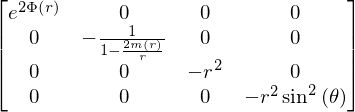

In [3]:
g.tensor()

Die Chistoffel Symbole (zweiter Art): 
$$ \Gamma^{\sigma}_{\mu \nu} = \frac{1}{2}g^{\sigma \alpha} \left( g_{\nu \alpha| \mu} + g_{\mu \alpha| \nu} - g_{\mu \nu| \alpha} \right)$$

Hier speziell $$ \Gamma^{1}_{1 1} = \Gamma^{r}_{r r}$$

ull


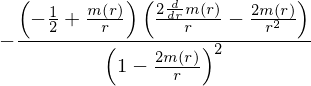

In [4]:
chr = ChristoffelSymbols.from_metric(g)
print(chr.config)
chr.tensor()[1,1,1]

Die Chistoffel Symbole in kovarianter Form (erster Art): 
$$ \Gamma_{\mu \nu \sigma} = \Gamma^{\rho}_{\mu \nu} g_{\rho \sigma} = \frac{1}{2} \left( g_{\nu \sigma| \mu} + g_{\mu \sigma| \nu} - g_{\mu \nu| \sigma} \right)$$

Hier speziell $$ \Gamma_{1 1 1} = \Gamma_{r r r}$$

lll


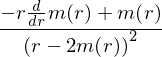

In [5]:
chr_lll = chr.change_config('lll') 
print(chr_lll.config)
chr_lll.tensor()[1,1,1]

Der Riemann Tensor:
$$ R^{\mu}_{\nu \rho \sigma} = \frac{\partial \Gamma^{\mu}_{\nu \sigma}}{\partial x^{\rho}} - \frac{\partial \Gamma^{\mu}_{\nu \rho}}{\partial x^{\sigma}} + \Gamma^{\alpha}_{\nu \sigma}\Gamma^{\mu}_{\rho \alpha} - \Gamma^{\alpha}_{\nu \rho}\Gamma^{\mu}_{\sigma \alpha} $$

Hier speziell $$ R^{0}{}\!_{2 0 2} =  R^{t}{}\!_{\theta t \theta} $$

ulll


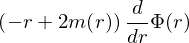

In [6]:
rm = RiemannCurvatureTensor.from_christoffels(chr)
print(rm.config)
rm[0,2,0,2]

Der Ricci Tensor:

$$ R_{\mu \nu} = R^{\sigma}{}\!_{\mu \sigma \nu} = \frac{\partial \Gamma^{\sigma}_{\mu \nu}}{\partial x^{\sigma}} - \frac{\partial \Gamma^{\sigma}_{\mu \sigma}}{\partial x^{\nu}} + \Gamma^{\rho}_{\mu \nu}\Gamma^{\sigma}_{\rho \sigma} - \Gamma^{\sigma}_{\mu \rho}\Gamma^{\rho}_{\nu \sigma} $$

ll


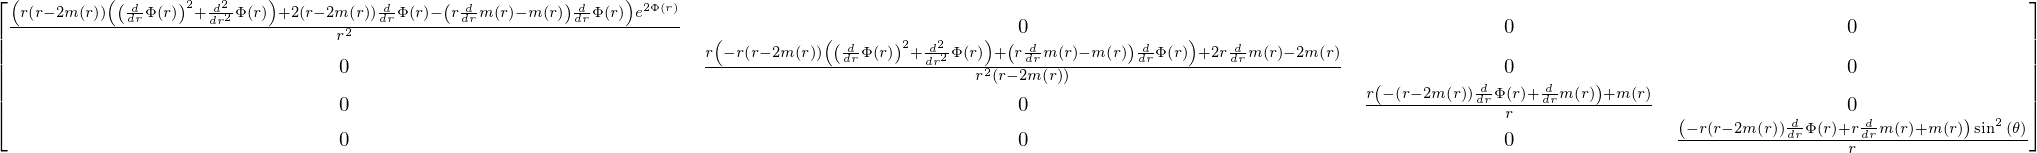

In [7]:
ric = RicciTensor.from_metric(g)
print(ric.config)
ric.simplify()

Der Ricci Skalar ergibt sich aus der Kontraktion des Ricci Tensors: $R = R^{\mu}{}_{\!\mu} = g^{\mu \nu}R_{\nu \mu}$

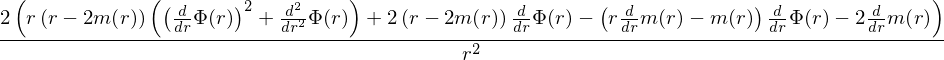

In [8]:
R = RicciScalar.from_riccitensor(ric)
R.simplify()

Der Einstein Tensor:$$ G_{\mu \nu} = R_{\mu \nu} - \frac{1}{2}g_{\mu \nu}R $$

ll


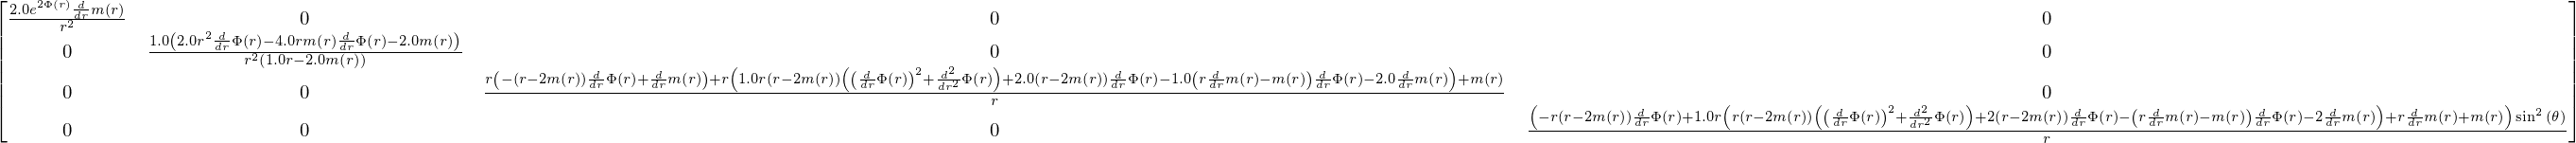

In [9]:
einst = EinsteinTensor.from_metric(g)
print(einst.config)
einst.simplify()

Der Energie-Impuls Tensor (rechte Seite der Einsteingleichung) wird als ideale Flüssigkeit angesetzt:

$$ T^\mu{}\!_\nu=\left( \begin{array}{ccc} e(r) & 0 & 0 & 0\\ 0& -p(r)&  0&0 \\ 0&  0&  -p(r)& 0\\ 0&  0&  0& -p(r)\\ \end{array} \right) \quad  ,
$$

wobei die Funktionen $e(r)$ und $p(r)$ die Energiedichte und den Druck der Neutronensternmaterie darstellen, die ihrerseits &uuml;ber die Zustandsgleichung  $p(e)$ miteinander verknüpft sind.

In [10]:
e = Function('e')(r)
p = Function('p')(r)

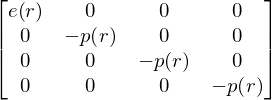

In [11]:
enImM = diag(e, -p, -p, -p).tolist()
T=Tensor(enImM,config="ul")
T.tensor()

Die Einstein Gleichung
$$ G^\mu{}\!_\nu = R^\mu{}\!_\nu - \frac{1}{2}g^\mu{}\!_\nu R =  8\pi T^\mu{}\!_\nu$$

stellt demnach (in dem betrachteten Fall) ein System von vier gekoppelten Differentialgleichungen zweiter Ordnung dar

$$
\begin{eqnarray}
G^t{}\!_t &=& R^t\!_t - \frac{1}{2} R =  8\pi T^t{}\!_t = 8\pi \, e(r) \\
G^r\!_r &=& R^r\!_r - \frac{1}{2} R =  8\pi T^r\!_r = -8\pi \, p(r)\\
G^\theta{}\!_\theta &=& R^\theta\!_\theta - \frac{1}{2} R =  8\pi T^\theta{}\!_\theta = -8\pi \, p(r)\\
G^\phi{}\!_\phi &=& R^\phi{}\!_\phi - \frac{1}{2} R =  8\pi T^\phi{}\!_\phi = -8\pi \, p(r) \quad.
\end{eqnarray}
$$

In [12]:
einst_ul = einst.change_config('ul')

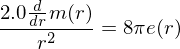

In [13]:
EinstGl1=Eq(einst_ul[0,0],8*Pi*T[0,0])
EinstGl1

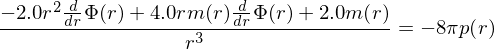

In [14]:
EinstGl2=Eq(einst_ul[1,1],8*Pi*T[1,1])
EinstGl2

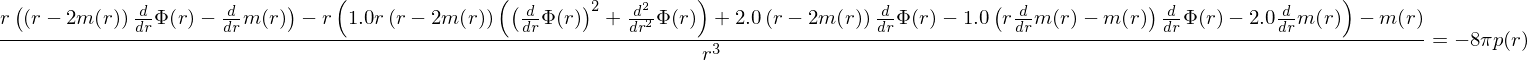

In [15]:
EinstGl3=Eq(einst_ul[2,2],8*Pi*T[2,2])
EinstGl3

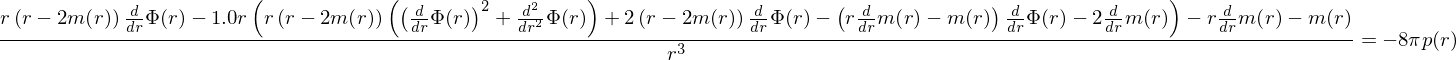

In [16]:
EinstGl4=Eq(einst_ul[3,3],8*Pi*T[3,3])
EinstGl4

Im Folgenden lösen wir die erste Gleichung der Einsteingleichung (tt-Komponente) nach $\frac{dm}{dr}$ und die zweite Gleichung (rr-Komponente) nach $\frac{d\Phi}{dr}$ auf.

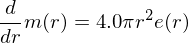

In [17]:
Eq1=Eq(Fm.diff(r),solve(EinstGl1,Fm.diff(r))[0])
Eq1

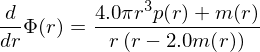

In [18]:
Eq2=Eq(Fphi.diff(r),solve(EinstGl2,Fphi.diff(r))[0])
Eq2

Aus der Einsteingleichung folgt die Erhaltung des Energie-Impulses. Diese sogenannten hydrodynamischen Gleichungen (kovariante Erhaltung des Energie-Impulses) sind durch die folgenden vier Gleichungen definiert (Bemerke: in der Literatur wird die kovariante Ableitung mit unterschiedlichen Symbolen bezeichnet):
$$
\nabla\!_\mu G^\mu{}\!_\nu = D\!_\mu G^\mu{}\!_\nu  =  G^\mu{}_{\nu \, ||\mu} = 0 \quad \rightarrow \quad \nabla\!_\mu T^\mu{}\!_\nu = 0 \quad ,
$$

wobei die kovariante Ableitung eines Tensors zweiter Stufe wie folgt definiert ist:

$$
\nabla\!_\alpha T^\mu{}\!_\nu = \partial_\alpha T^\mu{}\!_\nu + \Gamma^\mu_{\alpha \rho} T^\rho{}\!_\nu  - \Gamma^\rho_{\alpha \nu} T^\mu{}\!_\rho   \quad .
$$

Durch Kontraktion erhält man vier Gleichungen: $\nabla\!_\alpha T^\alpha{}\!_\nu=0\,\, \forall \, \nu=0,1,2,3$, wobei die Gleichung für $\nu=1=r$ die wichtige ist wie wir im Folgenden sehen werden.

Der erste Term der kovarianten Ableitung lautet $\partial_\alpha T^\alpha{}\!_\nu$ und liefert lediglich einen nicht-verschwindenen Beitrag für die Komponente $\partial_1 T^1{}\!_1 = \partial_r T^r\!_r$, da der Energie-Impuls Tensor in unserem Ansatz nur von der $r$-Koordinate abhängt.

In [19]:
dT=GenericVector([diff(T[0,0],t), diff(T[1,1],r), diff(T[2,2],theta), diff(T[3,3],phi)],[t, r, theta, phi], config='l',parent_metric=Metric)
dT.tensor()

Der zweite Term der kovarianten Ableitung lautet $\Gamma^\alpha_{\alpha \rho} T^\rho{}\!_\nu$

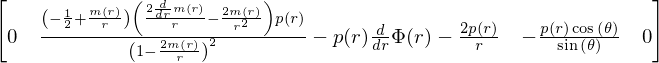

In [20]:
tensorcontraction(tensorproduct(chr.tensor(),T.tensor()),(0, 1),(2, 3))

und der dritte Term der kovarianten Ableitung lautet $- \Gamma^\rho_{\alpha \nu} T^\alpha{}\!_\rho$

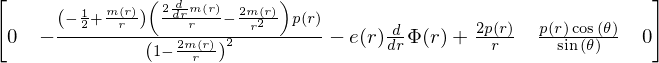

In [21]:
-tensorcontraction(tensorproduct(chr.tensor(),T.tensor()),(0, 4),(1, 3))

Zusammengefasst erhält man somit für die kovariante Ableitung des Energie-Impuls Tensor:  $\nabla\!_\alpha T^\alpha{}\!_\nu$

In [22]:
DT = dT.tensor() + tensorcontraction(tensorproduct(chr.tensor(),T.tensor()),(0, 1),(2, 3)) - tensorcontraction(tensorproduct(chr.tensor(),T.tensor()),(0, 4),(1, 3))
DT

Nur die r-Komponente ist von null verschieden, sodass man die kovariante Erhaltung des Energie-Impulses in folgender Gleichung zusammenfassen kann: $\nabla\!_1 T^1{}\!_1=\nabla\!_r T^r{}\!_r=0$

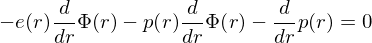

In [23]:
Hydro1 = Eq(DT[1],0)
Hydro1

Wir lösen diese Gleichung nach $\frac{d\Phi}{dr}$ auf:

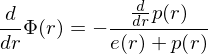

In [24]:
EqHydro2 = Eq(Fphi.diff(r),solve(Hydro1,Fphi.diff(r))[0])
EqHydro2

Durch Kombination dieser Gleichung mit der zweiten Einsteingleichung erhält man:

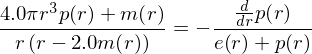

In [25]:
Eq3=Eq(solve(Eq2,Fphi.diff(r))[0],solve(EqHydro2,Fphi.diff(r))[0])
Eq3

Wir lösen diese Gleichung nach $\frac{dp}{dr}$ auf:

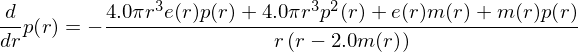

In [26]:
Eq4 = Eq(p.diff(r),solve(Eq3,p.diff(r))[0])
Eq4

## Die Numerische Lösung der TOV Gleichung
Man kann die Tolman-Oppenheimer-Volkoff Gleichungen somit als folgendes System von Differentialgleichungen definieren

$$
\begin{equation}
\frac{dm}{dr} ~=~ 4\pi r^2~e ~, \quad
\frac{d\Phi}{dr} ~=~ \frac{m+4 \pi r^3 p}{r \left( r - 2m \right)} ~, \quad
\frac{dp}{dr} ~=~ -(e+p) \frac{d\Phi}{dr} \quad .
\end{equation}
$$

Um dieses System von gekoppelten Differentialgleichungen erster Ordnung lösen zu können, muss man zusätzlich noch eine Zustandsgleichung der Materie definieren, die das Druck-Verhalten der Materie bei Erhöhung der Energiedichte beschreibt - eine Funktion $p(e)$.

Die Zustandsgleichung der Materie ist ein aktuelles Forschungsfeld und analytische Funktionen $p(e)$ sind nur mittels grober Vereinfachungen möglich. So erhält man z.B. für die Neutronenstern-Materie in einem einfachen nicht-relativistischen Fermigas Model von Neutronen ohne nukleare Wechselwirkungen eine polytrope Zustandsgleichung der Form $p(e)=K\,e^{\gamma}$ mit $K\approx 7.3015389$ und $\gamma=\frac{5}{3}$ (siehe z.B. I. Sagert, M. Hempel, C. Greiner, J. Schaffner-Bielich, <A href="https://arxiv.org/pdf/astro-ph/0506417.pdf" target="_blank">"Compact Stars for Undergraduates"</A> , Eur.J.Phys.27:577-610,2006 ;  bzw. Silbar, Richard R., and Sanjay Reddy. <A href="http://arxiv.org/pdf/nucl-th/0309041" target="_blank">"Neutron stars for undergraduates"</A> , American journal of physics 72.7 (2004): 892-905 ). 

Die Zustandsgleichung der Materie eines Weißen Zwerges erhält in Näherung mittels eines nicht-relativistischen Fermigas Model für Elektronen ohne Wechselwirkungen ($p(e)=K\,e^{\gamma}$ mit $K\approx 3758.7193$ und $\gamma=\frac{5}{3}$).


### Polytrope Zustangsgleichung der Form $p(e)=K\,e^{\gamma}$

Im Folgenden werden die TOV-Gleichungen numerisch gelöst, indem wir einerseits eine Zustandsgleichung der Materie (eine Funktion $p(e)$, hier speziell $p(e)=10\,e^{5/3}$) festlegen und von einem Startwert der zentralen Energiedichte im Inneren des sphärisch symmetrischen Objektes nach Außen integrieren, bis der Druck am Sternrand $r=R$ null wird (bzw. bis die numerische Lösung zusammenbricht). 

In [27]:
setK=10
setgamma=5.0/3.0

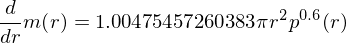

In [28]:
TOV1=Eq1.subs(e,(p/setK)**(1/setgamma))
TOV1

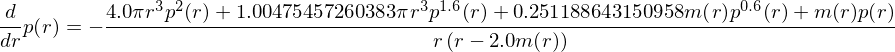

In [29]:
TOV2=Eq4.subs(e,(p/setK)**(1/setgamma))
TOV2

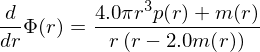

In [30]:
TOV3=Eq2
TOV3

Wir schreiben jedoch zunächst das System der TOV-Gleichungen ein wenig um und benennen $m(r)=y_1$, $p(r)=y_2$ und $\Phi(r)=y_3$

In [31]:
import numpy as np
y1, y2, y3 = symbols('y1, y2, y3')
TOV1a=TOV1.subs([(Fm,y1),(p,y2),(Pi,np.pi)])
TOV2a=TOV2.subs([(Fm,y1),(p,y2),(Pi,np.pi)])
TOV3a=TOV3.subs([(Fm,y1),(p,y2),(Fphi,y3),(Pi,np.pi)])

Zusätzlich benutzen wir die Funktion lambdify() um die numerischen Werte der TOV-Gleichungen zu erhalten (siehe <A href="http://docs.sympy.org/latest/modules/utilities/lambdify.html" target="_blank">http://docs.sympy.org/latest/modules/utilities/lambdify.html</A>):

In [32]:
TOV1b=lambdify([r,(y1,y2,y3)], TOV1a.rhs)
TOV2b=lambdify([r,(y1,y2,y3)], TOV2a.rhs)
TOV3b=lambdify([r,(y1,y2,y3)], TOV3a.rhs)

Wir definieren das Differentialgleichungssystem der TOV-Gleichungen:

In [33]:
def DGLSysTOV(y, r):
    y1, y2, y3 = y
    dy1 = TOV1b(r,(y1,y2,y3))
    dy2 = TOV2b(r,(y1,y2,y3))
    dy3 = TOV3b(r,(y1,y2,y3))
    return np.array([dy1, dy2, dy3])

Zur numerischen Lösung (mittels der Funktion odeint()) müssen wir den eindimensionalen Raum der radialen Koordinate $r$ in einzelne Stützstellen aufteilen (hier speziell $r \in [10^{-14},30]$ mit $100000$ Punkten). Da die TOV Gleichungen bei $r=0$ singulär sind, beginnen wir die Integration bei einem sehr kleinen Wert nahe null ($10^{-14}$).

In [34]:
pts = np.linspace(10**(-14), 30, 100001)

Als Rand- bzw. Anfangsbedingungen der Integration setzen wir die integrierte Masse im Sternzentrum auf null ($m(r=10^{-14})=0$), den zentralen Druck auf $p(r=10^{-14})=K\,(0.0005)^{\gamma}$ und die Metrik-Komponente $\Phi$ willkürlich zunächst auf null ($\Phi(r=10^{-14})=0$), sodass $g_{tt}(r=10^{-14})=1$ ist.

In [35]:
Randbedingungen = np.array([0, setK*(0.0005)**setgamma, 0])

Das eigentliche nummerische Lösen der TOV-Gleichung:

In [36]:
import matplotlib.pyplot as plt 
import matplotlib
from scipy import integrate

In [37]:
LoesTOV = integrate.odeint(DGLSysTOV, Randbedingungen, pts)

<string>:3: RuntimeWarning: invalid value encountered in double_scalars
<string>:3: RuntimeWarning: invalid value encountered in double_scalars


Wir können uns nun z.B. die Druckverteilung $p(r)$ , die Energiedichteverteilung $e(r)$ und die Sternmasse $m(r)$ als Funktion des radialen Abstands $r$ vom Sternzentrum betrachten.

In [38]:
import matplotlib.gridspec as gridspec
params = {
    'figure.figsize'    : [16,5],
#    'text.usetex'       : True,
    'axes.titlesize' : 14,
    'axes.labelsize' : 16,  
    'xtick.labelsize' : 14 ,
    'ytick.labelsize' : 14 
}
matplotlib.rcParams.update(params) 

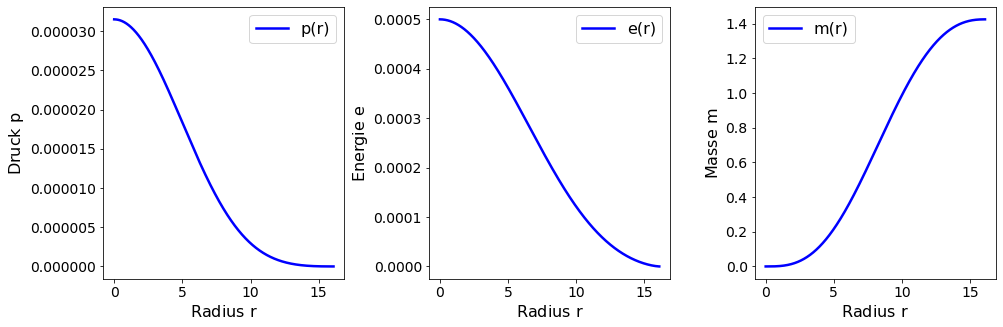

In [39]:
fig = plt.figure(figsize=(16,5))
gs = gridspec.GridSpec(1, 3, width_ratios=[1,1,1], wspace=0.35)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])

ax1.set_ylabel(r"$\rm Druck \,\,p$")
ax1.set_xlabel(r"$\rm Radius \,\,r$")
ax2.set_ylabel(r"$\rm Energie \,\,e $")
ax2.set_xlabel(r"$\rm Radius \,\,r$")
ax3.set_ylabel(r"$\rm Masse \,\,m$")
ax3.set_xlabel(r"$\rm Radius \,\,r$")

ax1.plot(pts, LoesTOV[:, 1], linewidth=2.5, label='p(r)', c="blue")
ax2.plot(pts, (LoesTOV[:, 1]/setK)**(1/setgamma), linewidth=2.5, label='e(r)', c="blue")
ax3.plot(pts, LoesTOV[:, 0],linewidth=2.5, label='m(r)', c="blue")
ax1.legend(loc='best',fontsize=16)
ax2.legend(loc='best',fontsize=16)
ax3.legend(loc='best',fontsize=16);

Aufgrund des Birkhoff-Theorems muss die Innenraum-Lösung der Metrik in die äußere Schwarzschildmetrik am Sternrand stetig ineinander übergehen. Da wir nun die Gesamtmasse und den Radius des Sterns kennen, können wir auch die innere $g_{tt}$ und $g_{rr}$ Komponente der Metrik angeben. Der zuvor gewählte Randwert der Metrik-Komponente $\Phi$  ($\Phi(r=10^{-14})=0$) war willkürlich gewählt und erst nachdem die Gesamtmasse und der Radius des Sterns durch die numerischen Lösungen bekannt sind, kann man die wirkliche Form der $g_{tt}$-Komponente ($g_{tt}(r)=e^{2\,\Phi(r)}$) durch eine y-Achsenverschiebung erhalten. Am Sternrand ($r=R$) gilt für die $g_{tt}$-Komponente der Metrik:

$$
g_{tt}(R)=e^{2\,\Phi(R)} = \left( 1 - \frac{M}{R} \right) = \left( 1 - \frac{m(R)}{R} \right) \quad ,
$$
wobei $M=m(R)$ die Gesamtmasse des Stern ist.

Der Radius des Sterns befindet sich an der Position bei der die Dichte und der Druck null bzw. kleiner null wird, oder die numerische Lösung "zusammenbricht" und Unendlichkeit-Werte erzeugt (siehe obere Warnungen beim numerischen Lösen der TOV-Gleichungen).

In [40]:
j=0
while LoesTOV[j, 1]>0 and np.isnan(LoesTOV[j, 1])==False:
    j=j+1
itend=j-1
R=pts[itend]
R

Seine Masse (in km) erhält man nun durch $M=m(R)$ :

In [41]:
M=LoesTOV[itend, 0]
M

Die $g_{tt}$-Komponente am Sternrand sollte, wie oben diskutiert, dem Wert der Schwarzschildmetrik entsprechen ($g_{tt}(R)=e^{2\, \Phi(R)}=(1-\frac{2M}{R})$). Dafür ist ein y-Achsen-Shift nötig. Diesen y-Achsen-Shift berechnen wir und addieren den Wert zu den nummerisch berechneten $g_{tt}$-Punkten.

In [42]:
PhiSM=ln((1-2*M/R))/2
shiftphi=PhiSM-LoesTOV[itend, 2]
j=0
LoesTOVgtt=[]
while j<itend:
    LoesTOVgtt.append(exp(2*(LoesTOV[j, 2]+shiftphi)))
    j=j+1

Veranschaulichung der $g_{tt}$-Komponente der Innenraum-Metrik (blau) und Außenraum-Metrik (rot). 

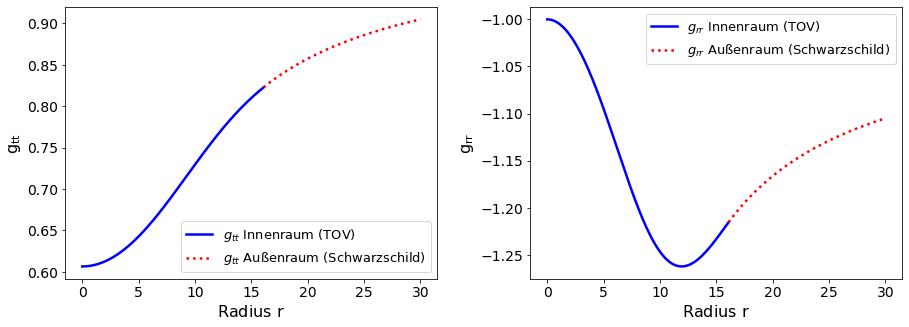

In [43]:
fig = plt.figure(figsize=(15,5))
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1], wspace=0.25)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

ax1.set_ylabel(r"$\rm g_{tt} $")
ax1.set_xlabel(r"$\rm Radius \,\,r$")
ax2.set_ylabel(r"$\rm g_{rr} $")
ax2.set_xlabel(r"$\rm Radius \,\,r$")

ax1.plot(pts[:itend], LoesTOVgtt, linewidth=2.5, linestyle="-", label='$g_{tt}$ Innenraum (TOV)', c="blue")
ax1.plot(pts[itend+1:], (1-2*M/pts[itend+1:]), linewidth=2.5, linestyle=":", label='$g_{tt}$ Außenraum (Schwarzschild)', c="red")
ax2.plot(pts, -(1-2*LoesTOV[:, 0]/pts[:])**(-1), linewidth=2.5, linestyle="-", label='$g_{rr}$ Innenraum (TOV)', c="blue")
ax2.plot(pts[itend:], -(1-2*M/pts[itend:])**(-1), linewidth=2.5, linestyle=":", label='$g_{rr}$ Außenraum (Schwarzschild)', c="red")

ax1.legend(loc='lower right',fontsize=13)
ax2.legend(loc='upper right',fontsize=13);

Im Folgenden wird eine Sequenz von Sternen mit unterschiedlichen zentralen Energiedichte-Werten berechnet. Trägt man die Gesamtmasse der einzelnen Sterne gegen deren Radius auf, so erhält man die Masse-Radius-Beziehung. Jede Zustandsgleichung besitzt eine eigene Obergrenze, die sogenannte maximale Masse. Die Berechnung erfolgt durch eine for-Schleife über einen geeigneten zentralen Energiedichtebereich: 

In [44]:
AnzSterne=40
AnzPunkte=10000
eAnf=0.0002
eEnd=0.004
stars = np.linspace(eAnf, eEnd, AnzSterne+1)
PropStars=[0,int(AnzSterne/4),AnzSterne]
pts = np.linspace(10**(-14), 30, AnzPunkte+1)
Liste0=[]
ListM=[]
ListR=[]
ListProfitend=[]
ListProfe=[]
ListProfgtt=[]
for e0 in stars:
    Randbedingungen = np.array([0, setK*(e0)**setgamma, 1])
    LoesTOV = integrate.odeint(DGLSysTOV, Randbedingungen, pts)
    j=0
    while LoesTOV[j, 1]>0 and np.isnan(LoesTOV[j, 1])==False:
        j=j+1   
    itend=j-1
    Liste0.append(e0)
    R=pts[itend]
    ListR.append(R)
    M=LoesTOV[itend, 0]
    ListM.append(M)
    if e0 in stars[PropStars]:
        ListProfe.append((LoesTOV[:, 1]/setK)**(1/setgamma))
        ListProfitend.append(int(itend))
        PhiSM=ln((1-2*M/R))/2
        shiftphi=PhiSM-LoesTOV[itend, 2]
        j=0
        LoesTOVgtt=[]
        while j<itend:
            LoesTOVgtt.append(exp(2*(LoesTOV[j, 2]+shiftphi)))
            j=j+1
        ListProfgtt.append(LoesTOVgtt)

<string>:3: RuntimeWarning: invalid value encountered in double_scalars
<string>:3: RuntimeWarning: invalid value encountered in double_scalars


Die berechnete Masse-Radius Relation (bzw. Masse-(zentrale Energiedichte) Relation) können wir uns nun darstellen. Zusätzlich stellen wir uns drei der berechneten Energiedichten- und Metrik-Profile der Sterne dar.

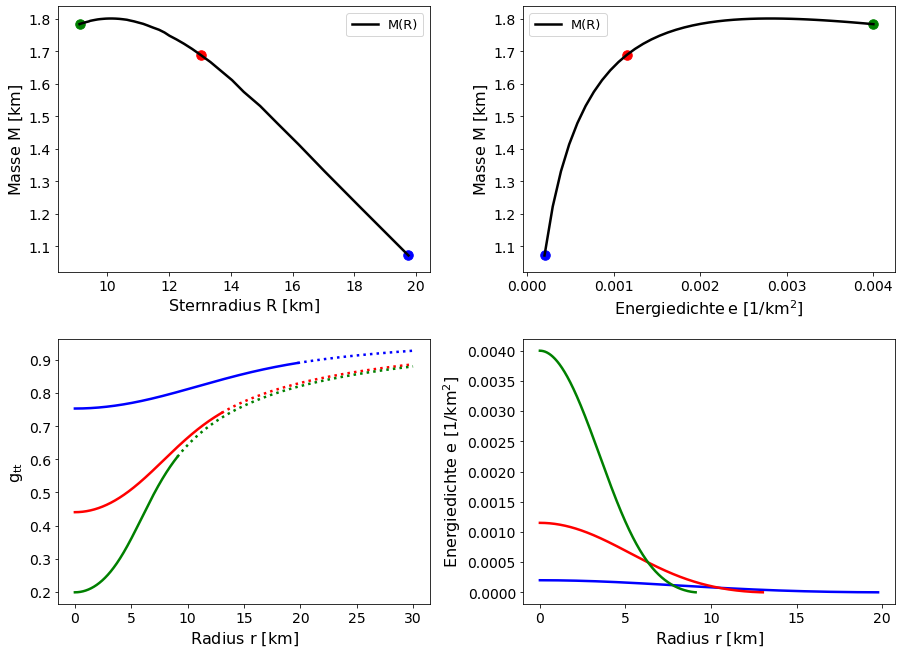

In [45]:
fig = plt.figure(figsize=(15,11))
gs = gridspec.GridSpec(2, 2, width_ratios=[1,1], wspace=0.25, hspace=0.25)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
ax4 = plt.subplot(gs[3])

ax1.set_ylabel(r"$\rm Masse \,\, M \,\,[km]$")
ax1.set_xlabel(r"$\rm Sternradius \,\,R \,\,[km]$")
ax2.set_ylabel(r"$\rm Masse \,\, M \,\,[km]$")
ax2.set_xlabel(r"$\rm Energiedichte \, e \,\,[1/km^2]$")
ax3.set_ylabel(r"$\rm g_{tt} $")
ax3.set_xlabel(r"$\rm Radius \,\,r \,\,[km]$")
ax4.set_ylabel(r"$\rm Energiedichte \,\,e \,\,[1/km^2]$")
ax4.set_xlabel(r"$\rm Radius \,\,r \,\,[km]$")

ax1.plot(ListR, ListM, linewidth=2.5, label='M(R)', c="black")
ax1.scatter(ListR[PropStars[0]], ListM[PropStars[0]], s=90, marker='o',c="blue")
ax1.scatter(ListR[PropStars[1]], ListM[PropStars[1]], s=90, marker='o',c="red")
ax1.scatter(ListR[PropStars[2]], ListM[PropStars[2]], s=90, marker='o',c="green")
ax2.plot(Liste0, ListM, linewidth=2.5, label='M(R)', c="black")
ax2.scatter(Liste0[PropStars[0]], ListM[PropStars[0]], s=90, marker='o',c="blue")
ax2.scatter(Liste0[PropStars[1]], ListM[PropStars[1]], s=90, marker='o',c="red")
ax2.scatter(Liste0[PropStars[2]], ListM[PropStars[2]], s=90, marker='o',c="green")
ax3.plot(pts[:ListProfitend[0]], ListProfgtt[0], linewidth=2.5,c="blue",linestyle="-")
ax3.plot(pts[ListProfitend[0]+1:], (1-2*ListM[PropStars[0]]/pts[ListProfitend[0]+1:]), linewidth=2.5,c="blue",linestyle=":")
ax3.plot(pts[:ListProfitend[1]], ListProfgtt[1], linewidth=2.5,c="red",linestyle="-")
ax3.plot(pts[ListProfitend[1]+1:], (1-2*ListM[PropStars[1]]/pts[ListProfitend[1]+1:]), linewidth=2.5,c="red",linestyle=":")
ax3.plot(pts[:ListProfitend[2]], ListProfgtt[2], linewidth=2.5,c="green",linestyle="-")
ax3.plot(pts[ListProfitend[2]+1:], (1-2*ListM[PropStars[2]]/pts[ListProfitend[2]+1:]), linewidth=2.5,c="green",linestyle=":")
ax4.plot(pts, ListProfe[0], linewidth=2.5, label='e(r)', c="blue")
ax4.plot(pts, ListProfe[1], linewidth=2.5, c="red")
ax4.plot(pts, ListProfe[2], linewidth=2.5, c="green")

ax1.legend(loc='best',fontsize=13)
ax2.legend(loc='best',fontsize=13);

In den oberen Abbildungen sind die Masse-Radius-Relation (links) und die Masse-(zentrale Energiedichte)-Relation (rechts) dargestellt. Man erkennt, dass sich ein maximaler Wert der Masse von ca. $M_{max} \approx 1.8 \, [\rm km] $ ergibt. Um zu entscheiden, ob der Wert von $M_{max}$ ein realistischer ist, muss man diesen Wert mit den beobachteten Massenwerten von Neutronensternen vergleichen. Von den rund 3000 bekannten Neutronensternen in unserer Galaxie kennt man bei einigen die Masse relativ genau, und gerade in den letzten Jahren wurden sehr massereiche Neutronensterne gefunden, die knapp über zwei Sonnenmassen schwer sind (z.B $M=2.14^{0.10}_{-0.09}\,M_{\odot}$ für den Millisekundenpulsar PSR J0740+6620, siehe Cromartie, H. Thankful, et al., <A href="http://arxiv.org/pdf/1904.06759.pdf" target="_blank">"Relativistic Shapiro delay measurements of an extremely massive millisecond pulsar."</A>Nature Astronomy 4.1 (2020): 72-76. oder <A href="http://arxiv.org/pdf/1304.6875.pdf%22%3E%3Cimg" target="_blank">Antoniadis, John, et al. "A massive pulsar in a compact relativistic binary." Science 340.6131 (2013).</A>, <A href="http://arxiv.org/pdf/1010.5788.pdf" target="_blank">Demorest, Paul B., et al. "A two-solar-mass neutron star measured using Shapiro delay." nature 467.7319 (2010): 1081-1083.</A>). 

Um unseren Wert der maximalen Masse mit den beobachteten Daten vergleichen zu können, müssen wir eine Einheiten-Umrechnung von $[km]$ in $[M_{\odot}]$ machen. Der theoretische Schwarzschildradius der Sonne beträgt 

$$R_S^{M_{\odot}} = 2 \, M_{\odot} \, \rm [km] = 2 \, \frac{G}{c^2} \, M_{\odot} \, \rm \left[ \frac{m}{kg} \right] \approx 1.485 \cdot 10^{-27} \cdot M_{\odot} \, \rm \left[ \frac{m}{kg} \right] \approx 2.953 \, \rm [km] \quad ,
$$
wobei $G=6.67408 \cdot 10^{-11} \, \rm \left[ \frac{m^3}{kg\,s^2} \right]$, $c=299792458 \, \rm \left[ \frac{m}{s} \right]$ und $M_{\odot}=1.98847 \cdot 10^{-30} \, \rm [kg]$.



In [46]:
uc = 299792458
uG = 6.67408*10**(-11)
uMs = 1.98847*10**(30)
2*uG/uc**2*(uMs)/1000

Man kann somit $[\rm km]$ in $[ \rm M_{\odot}]$ umrechnen, indem man durch $1.4766$ teilt. Für den Grenzwert unserer maximalen Masse erhalten wir somit $M_{max} \approx 1.8 \, [\rm km] \approx 1.22 \, [\rm M_{\odot}]$. Daraus folgt, dass in dem benutzten einfachen Ansatz der Zustandsgleichung ($p(e)=10\,e^{5/3}$) keine Neutronensterne existieren, die eine Masse oberhalb von $M_{max}$ haben, was den Beobachtungen widerspricht. 

In [47]:
umrechn=2*uG/uc**2*(uMs)/1000/2
max(ListM)/umrechn

Um einen größeren Wert der maximalen Masse zu erhalten Erhöhen wir z.B den $K$-Wert auf 20. Zusätzlich rechnen wir den dargestellten Massenwert der Sterne in Sonnenmassen dar.

In [48]:
setK=20
setgamma=5.0/3.0
TOV1=Eq1.subs(e,(p/setK)**(1/setgamma))
TOV2=Eq4.subs(e,(p/setK)**(1/setgamma))
TOV3=Eq2
TOV1a=TOV1.subs([(Fm,y1),(p,y2),(Pi,np.pi)])
TOV2a=TOV2.subs([(Fm,y1),(p,y2),(Pi,np.pi)])
TOV3a=TOV3.subs([(Fm,y1),(p,y2),(Fphi,y3),(Pi,np.pi)])
TOV1b=lambdify([r,(y1,y2,y3)], TOV1a.rhs)
TOV2b=lambdify([r,(y1,y2,y3)], TOV2a.rhs)
TOV3b=lambdify([r,(y1,y2,y3)], TOV3a.rhs)

def DGLSysTOV(y, r):
    y1, y2, y3 = y
    dy1 = TOV1b(r,(y1,y2,y3))
    dy2 = TOV2b(r,(y1,y2,y3))
    dy3 = TOV3b(r,(y1,y2,y3))
    return np.array([dy1, dy2, dy3])

In [49]:
AnzSterne=40
AnzPunkte=10000
eAnf=0.0002
eEnd=0.004
stars = np.linspace(eAnf, eEnd, AnzSterne+1)
PropStars=[0,int(AnzSterne/4),AnzSterne]
pts = np.linspace(10**(-14), 30, AnzPunkte+1)
Liste0=[]
ListM=[]
ListMsm=[]
ListR=[]
ListProfitend=[]
ListProfe=[]
ListProfgtt=[]
for e0 in stars:
    Randbedingungen = np.array([0, setK*(e0)**(setgamma), 1])
    LoesTOV = integrate.odeint(DGLSysTOV, Randbedingungen, pts)
    j=0
    while LoesTOV[j, 1]>0 and np.isnan(LoesTOV[j, 1])==False:
        j=j+1   
    itend=j-1
    Liste0.append(e0)
    R=pts[itend]
    ListR.append(R)
    M=LoesTOV[itend, 0]
    ListM.append(M)
    ListMsm.append(M/umrechn)
    if e0 in stars[PropStars]:
        ListProfe.append((LoesTOV[:, 1]/setK)**(1/setgamma))
        ListProfitend.append(int(itend))
        PhiSM=ln((1-2*M/R))/2
        shiftphi=PhiSM-LoesTOV[itend, 2]
        j=0
        LoesTOVgtt=[]
        while j<itend:
            LoesTOVgtt.append(exp(2*(LoesTOV[j, 2]+shiftphi)))
            j=j+1
        ListProfgtt.append(LoesTOVgtt)


<string>:3: RuntimeWarning: invalid value encountered in double_scalars
<string>:3: RuntimeWarning: invalid value encountered in double_scalars


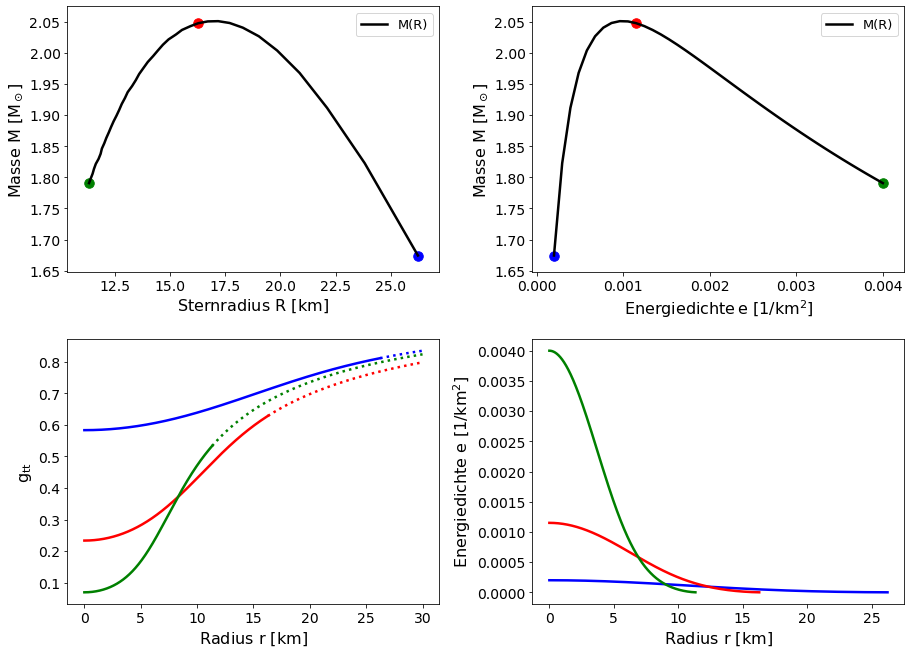

In [50]:
fig = plt.figure(figsize=(15,11))
gs = gridspec.GridSpec(2, 2, width_ratios=[1,1], wspace=0.25, hspace=0.25)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
ax4 = plt.subplot(gs[3])

ax1.set_ylabel(r"$\rm Masse \,\, M \,\,[M_\odot]$")
ax1.set_xlabel(r"$\rm Sternradius \,\,R \,\,[km]$")
ax2.set_ylabel(r"$\rm Masse \,\, M \,\,[M_\odot]$")
ax2.set_xlabel(r"$\rm Energiedichte \, e \,\,[1/km^2]$")
ax3.set_ylabel(r"$\rm g_{tt} $")
ax3.set_xlabel(r"$\rm Radius \,\,r \,\,[km]$")
ax4.set_ylabel(r"$\rm Energiedichte \,\,e \,\,[1/km^2]$")
ax4.set_xlabel(r"$\rm Radius \,\,r \,\,[km]$")

ax1.plot(ListR, ListMsm, linewidth=2.5, label='M(R)', c="black")
ax1.scatter(ListR[PropStars[0]], ListMsm[PropStars[0]], s=90, marker='o',c="blue")
ax1.scatter(ListR[PropStars[1]], ListMsm[PropStars[1]], s=90, marker='o',c="red")
ax1.scatter(ListR[PropStars[2]], ListMsm[PropStars[2]], s=90, marker='o',c="green")
ax2.plot(Liste0, ListMsm, linewidth=2.5, label='M(R)', c="black")
ax2.scatter(Liste0[PropStars[0]], ListMsm[PropStars[0]], s=90, marker='o',c="blue")
ax2.scatter(Liste0[PropStars[1]], ListMsm[PropStars[1]], s=90, marker='o',c="red")
ax2.scatter(Liste0[PropStars[2]], ListMsm[PropStars[2]], s=90, marker='o',c="green")
ax3.plot(pts[:ListProfitend[0]], ListProfgtt[0], linewidth=2.5,c="blue",linestyle="-")
ax3.plot(pts[ListProfitend[0]+1:], (1-2*ListM[PropStars[0]]/pts[ListProfitend[0]+1:]), linewidth=2.5,c="blue",linestyle=":")
ax3.plot(pts[:ListProfitend[1]], ListProfgtt[1], linewidth=2.5,c="red",linestyle="-")
ax3.plot(pts[ListProfitend[1]+1:], (1-2*ListM[PropStars[1]]/pts[ListProfitend[1]+1:]), linewidth=2.5,c="red",linestyle=":")
ax3.plot(pts[:ListProfitend[2]], ListProfgtt[2], linewidth=2.5,c="green",linestyle="-")
ax3.plot(pts[ListProfitend[2]+1:], (1-2*ListM[PropStars[2]]/pts[ListProfitend[2]+1:]), linewidth=2.5,c="green",linestyle=":")
ax4.plot(pts, ListProfe[0], linewidth=2.5, label='e(r)', c="blue")
ax4.plot(pts, ListProfe[1], linewidth=2.5, c="red")
ax4.plot(pts, ListProfe[2], linewidth=2.5, c="green")

ax1.legend(loc='best',fontsize=13)
ax2.legend(loc='best',fontsize=13);

Die berechneten Eigenschaften der Neutronensterne können wir auch in einer Animation visualisieren, wobei wir zusätzlich die Energiedichte $e$ in Einheiten der normalen nuklearen Kerndichte $e_{\rm nuc}$ darstellen ($e_{\rm nuc} = 2.705 \cdot 10^{14} \, [\rm \frac{g}{cm^3}] \approx 0.000201054535 \, [\rm \frac{1}{km^2}]$):

In [51]:
normalnuc=0.000201054535
AnzSterne=40
AnzPunkte=10000
eAnf=0.0002
eEnd=0.002
stars = np.linspace(eAnf, eEnd, AnzSterne+1)
pts = np.linspace(10**(-14), 30, AnzPunkte+1)
Liste0=[]
ListM=[]
ListMsm=[]
ListR=[]
ListProfitend=[]
ListProfe=[]
ListProfgtt=[]
for e0 in stars:
    Randbedingungen = np.array([0, setK*(e0)**(setgamma), 1])
    LoesTOV = integrate.odeint(DGLSysTOV, Randbedingungen, pts)
    j=0
    while LoesTOV[j, 1]>0 and np.isnan(LoesTOV[j, 1])==False:
        j=j+1   
    itend=j-1
    Liste0.append(e0)
    R=pts[itend]
    ListR.append(R)
    M=LoesTOV[itend, 0]
    ListM.append(M)
    ListMsm.append(M/umrechn)
    ListProfe.append((LoesTOV[:, 1]/setK)**(1/setgamma)/normalnuc)
    ListProfitend.append(int(itend))
    PhiSM=ln((1-2*M/R))/2
    shiftphi=PhiSM-LoesTOV[itend, 2]
    j=0
    LoesTOVgtt=[]
    while j<itend:
        LoesTOVgtt.append(exp(2*(LoesTOV[j, 2]+shiftphi)))
        j=j+1
    ListProfgtt.append(LoesTOVgtt)

In [52]:
import matplotlib.animation as animation
from IPython.display import HTML

In [53]:
fig = plt.figure(figsize=(16,5))
gs = gridspec.GridSpec(1, 3, width_ratios=[1,1,1],wspace=0.23)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])

def init():
    ax1.plot(ListR, ListMsm, linewidth=2.5, label='M(R)', c="black")
    ax1.scatter(ListR[0], ListMsm[0], s=90, marker='o',c="blue")
    ax2.plot(pts, ListProfe[0], linewidth=2.5, label='e(r)', c="blue")
    ax3.plot(pts[:ListProfitend[0]], ListProfgtt[0], linewidth=2.5,c="blue",linestyle="-")
    ax3.plot(pts[ListProfitend[0]+1:], (1-2*ListM[0]/pts[ListProfitend[0]+1:]), linewidth=2.5,c="blue",linestyle=":")
    ax1.set_xlim(min(ListR)-1, max(ListR)+1)
    ax1.set_ylim(min(ListMsm)-0.05, max(ListMsm)+0.05)
    ax2.set_xlim(0, max(ListR)+1)
    ax2.set_ylim(0, max(Liste0)/normalnuc+0.1)
    ax3.set_xlim(0, 0.85)
    ax3.set_ylim()
    return fig,

def animate(i):
    ax1.cla() 
    ax2.cla()
    ax3.cla()
    ax1.plot(ListR, ListMsm, linewidth=2.5, label='M(R)', c="black")
    ax1.scatter(ListR[i], ListMsm[i], s=90, marker='o',c="blue")
    ax2.plot(pts, ListProfe[i], linewidth=2.5, label='e(r)', c="blue")
    ax3.plot(pts[:ListProfitend[i]], ListProfgtt[i], linewidth=2.5,c="blue",linestyle="-")
    ax3.plot(pts[ListProfitend[i]+1:], (1-2*ListM[i]/pts[ListProfitend[i]+1:]), linewidth=2.5,c="blue",linestyle=":")
    ax1.set_xlim(min(ListR)-1, max(ListR)+1)
    ax1.set_ylim(min(ListMsm)-0.05, max(ListMsm)+0.05)
    ax2.set_xlim(0, max(ListR)+1)
    ax2.set_ylim(0, max(Liste0)/normalnuc+0.1)
    ax3.set_xlim(0, max(pts))
    ax3.set_ylim(0, 0.85)
    ax1.set_ylabel(r"$\rm Masse \,\, M \,\,[M_\odot]$")
    ax1.set_xlabel(r"$\rm Sternradius \,\,R \,\,[km]$")
    ax2.set_ylabel(r"$\rm Energiedichte \,\,e \,\,[e_{\rm nuc}]$")
    ax2.set_xlabel(r"$\rm Radius \,\,r \,\,[km]$")
    ax3.set_ylabel(r"$\rm Metrik \,\, g_{tt} $")
    ax3.set_xlabel(r"$\rm Radius \,\,r \,\,[km]$")
    return fig,

ani = animation.FuncAnimation(fig,animate,init_func=init,frames=AnzSterne,interval=1000)
plt.close(ani._fig)
HTML(ani.to_html5_video())

Die obere Animation zeigt die numerisch simulierten Resultate einer Sequenz von Neutronensternen mit unterschiedlichen zentralen Dichten unter Verwendung einer polytropen Zustandsgleichung ($p(e)=K\,e^{\gamma}$ mit $K\approx 20$ und $\gamma=\frac{5}{3}$). Die linke Abbildung zeigt die Gesamtmasse als Funktion des Sternradius (die Masse-Radius-Relation) und stellt zusätzlich einen der berechneten Sterne als blauen Punkt dar. Das radiale Energiedichten-Profil dieses blau markierten Sterns ist in der mittleren Abbildung in Einheiten der normalen nuklearen Kerndichte $e_{\rm nuc}$ darstellt. In der rechten Abbildung ist die $g_{00}=g_{tt}$ Komponente der Metrik visualisiert, wobei (aufgrund des Birkhoff-Theorems) die innere L&ouml;sung (durchgezogene Kurve) in die äußere Schwarzschildl&ouml;sung (gepunktete Kurve) stetig ineinander &uuml;bergeht.

Die Gesamtmasse und der Radius der Neutronensterne &auml;ndert sich bei Variation der zentralen Dichte im Stern. Wird die Dichte und als Folge dessen, die raumzeitliche Verzerrung im Sterninneren zu gro&szlig; und &uuml;berschreitet dieser die Maximalmasse $M_{\rm max}$, so wird der Stern instabil und kollabiert zwangsl&auml;ufig zu einem schwarzen Loch (falls nicht der enorme Druck der Materie nach dem QCD-Phasen&uuml;bergang zum Quark-Gluon Plasma diesen Kollaps aufhalten kann). Der Wert der maximalen Masse und der Radius der Sterne sind durch die Zustandsgleichung der Neutronenstern-Materie bestimmt und diese ist oberhalb von  ca. zweifacher nuklearer Kerndichte noch nicht bekannt. Durch astrophysikalische Beobachtungen der gemessenen Neutronenstern-Eigenschaften ist es jedoch möglich die Form der Zustandsgleichung einzuschränken. Einerseits muss eine adäquate Zustandsgleichung eine maximale Masse oberhalb von zwei Sonnenmassen ermöglichen, andererseits müssen auch die mittels des NICER-Telesops beobachteten Radiuswerte (siehe <A href="https://www.nasa.gov/nicer" target="_blank">NASA’s Neutron star Interior Composition Explorer (NICER)</A>) im Einklang mit den simulierten Radien sein. Bei der in der oberen Animation benutzten polytropen Zustandsgleichung $p(e)=20\,e^{\frac{5}{3}}$ ist dies nicht der Fall, da die berechneten Sterne einen zu großen Radius haben. Die Modellierung von realistischen Zustandsgleichungen ist ein aktuelles Forschungsfeld. Die Internetseite <A href="https://compose.obspm.fr/" target="_blank">CompOSE</A> stellt eine Reihe von Zustandsgleichungen frei zur Verfügung, die man in realistischen astrophysikalischen Simulationen verwenden kann.